## Predict Talent Migration with Machine Learning - 04 Final Take Model A

---

<p style="text-align: center;">
Project split into 5 Notebooks:</br>
</br>
Predict Talent Migration with Machine Learning - 01 Exploratory Analysis</br>
*</br>
Predict Talent Migration with Machine Learning - 02 Modeling</br>
*</br>
Predict Talent Migration with Machine Learning - 03 Grid Build</br>
*</br>
Predict Talent Migration with Machine Learning - 04 Final Take Model A</br>
*</br>
Predict Talent Migration with Machine Learning - 05 Final Take Model B</br> </p> 
         
---

This project aims to create a machine learning model that allows the prediction of employees departure from an Organization. </br>
We will focus our forecast on the Organization's best employees (Top Performers), although a comparison between employees in general will be made. Top Performers will be identified through the creation of a condition, which will be based on the classification of employees evaluation cycles. An analysis on model performance will also be presented, concerning the model's ability to predict the employees departure by **Generation** and **Gender.**

Employees are evaluated on a semiannual basis and our data concerns the last 3 evaluation cycles, between January 1st 2018 to September 31st 2019.

Ratings per evaluation are: </br>

  - Mid Year 2018 (MY2018): **0,1,2,3,4,5** </br>
  - Year End 2018 (YE2018): **0,1,2,3,4,5** </br>
  - Mid Year 2019: **0,1,2,3***.</br>
             
**Data from the Organization shows a change of ratings scale was purpousely made to decrease results granularity.*

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, PowerTransformer, OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance

from category_encoders.ordinal import OrdinalEncoder

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

## Data:

**The best models parameters results after GridSearch CV were chosen as the main models to finally fit our Test dataset and provide us with final findings. As we have been doing, we have 2 models, one with and another without the overestimating features previously identified.** 

**This notebook will go over the model A - with overestimating features.**

In [2]:
df = pd.read_csv('projeto_final.csv', index_col = False)

In [36]:
X = df.copy()

In [4]:
y = df.pop('Out')

## Train - Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape

(4504, 46)

In [7]:
y_train.shape

(4504,)

In [8]:
X_test.shape

(1126, 46)

Validação:

In [9]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2)

---

## Best model with overestimating Features:

**Initial Take:**

In [10]:
transf = ColumnTransformer(
    [('cat', OrdinalEncoder(), ['Generation', 'Gender', 'MProximity', 'Rehire', 'Contract Type', 'PeopleManager', 'Country', 'CostCenterH', 'TopPerformer']),
     ('null', SimpleImputer (missing_values= np.nan, strategy = 'median'), ['PayIncrease', 'Age']), 
     ('other', "passthrough", ['Tenure', 'Dependents', 'EmployeeCount', 'HireCount', 'MTenure', 'HomeOffice','TimeinPosition', 'TimeJobProfile', 'MTimeJobProfile', 'TerminationCount'])
    ])

In [11]:
model = Pipeline([
    ('Feature Eng', transf),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 100))
])

In [12]:
model.fit(X_train_, y_train_)

Pipeline(steps=[('Feature Eng',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['Generation', 'Gender',
                                                   'MProximity', 'Rehire',
                                                   'Contract Type',
                                                   'PeopleManager', 'Country',
                                                   'CostCenterH',
                                                   'TopPerformer']),
                                                 ('null',
                                                  SimpleImputer(strategy='median'),
                                                  ['PayIncrease', 'Age']),
                                                 ('other', 'passthrough',
                                                  ['Tenure', 'Dependents',
                                                   'EmployeeCount', 'HireCount',
              

## Feature Importance:

In [13]:
results = permutation_importance(model, X_val, y_val, scoring='roc_auc')

importance = results.importances_mean

In [14]:
importance

array([ 0.00000000e+00,  6.32842069e-04, -1.47257482e-04,  6.81522229e-05,
        1.18901289e-03,  3.94309289e-04, -1.33870438e-05,  0.00000000e+00,
        1.02350035e-03,  6.37710085e-04,  7.05764948e-02,  2.70941596e-02,
        5.68827660e-03,  6.34059073e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.89319573e-03,  1.36754737e-02, -4.74631552e-05,
        3.03155691e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.68222809e-01,  7.60639657e-02,
        0.00000000e+00,  5.20877703e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.63678516e-04,
        0.00000000e+00,  3.45629130e-04])

In [15]:
for f,s in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (f,s))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00063
Feature: 2, Score: -0.00015
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00119
Feature: 5, Score: 0.00039
Feature: 6, Score: -0.00001
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00102
Feature: 9, Score: 0.00064
Feature: 10, Score: 0.07058
Feature: 11, Score: 0.02709
Feature: 12, Score: 0.00569
Feature: 13, Score: 0.00063
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00389
Feature: 18, Score: 0.01368
Feature: 19, Score: -0.00005
Feature: 20, Score: 0.00303
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.16822
Feature: 35, Score: 0.07606

In [16]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 2232 to 2049
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                901 non-null    int64  
 1   Rehire            901 non-null    object 
 2   Age               896 non-null    float64
 3   Generation        901 non-null    object 
 4   CostCenterH       901 non-null    object 
 5   Gender            901 non-null    object 
 6   Dependents        901 non-null    int64  
 7   ManagementLevel   901 non-null    object 
 8   EmployeeCount     901 non-null    int64  
 9   HireCount         901 non-null    int64  
 10  TerminationCount  901 non-null    int64  
 11  Tenure            901 non-null    int64  
 12  PayIncrease       883 non-null    float64
 13  PeopleManager     901 non-null    object 
 14  BLeave            901 non-null    object 
 15  BTimeOut          901 non-null    object 
 16  ParentLeave       901 non-null    object

In [17]:
f_imp = pd.Series(importance, name = 'Features Importances')

In [18]:
f_imp.sort_values()

2    -0.000147
19   -0.000047
6    -0.000013
0     0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
32    0.000000
23    0.000000
33    0.000000
36    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
31    0.000000
44    0.000000
22    0.000000
16    0.000000
15    0.000000
14    0.000000
21    0.000000
7     0.000000
3     0.000068
45    0.000346
5     0.000394
43    0.000464
37    0.000521
1     0.000633
13    0.000634
9     0.000638
8     0.001024
4     0.001189
20    0.003032
17    0.003893
12    0.005688
18    0.013675
11    0.027094
10    0.070576
35    0.076064
34    0.168223
Name: Features Importances, dtype: float64

---

**Filter by the Features actually used in the model:**

In [37]:
f_imp_used = f_imp[f_imp != 0]

In [38]:
f_imp_used.sort_values(ascending = False)

34    0.168223
35    0.076064
10    0.070576
11    0.027094
18    0.013675
12    0.005688
17    0.003893
20    0.003032
4     0.001189
8     0.001024
9     0.000638
13    0.000634
1     0.000633
37    0.000521
43    0.000464
5     0.000394
45    0.000346
3     0.000068
6    -0.000013
19   -0.000047
2    -0.000147
Name: Features Importances, dtype: float64

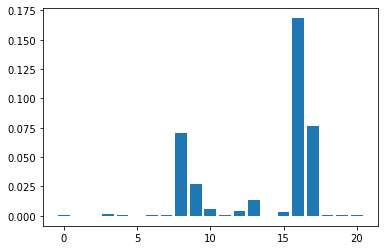

In [39]:
pyplot.bar([x for x in range(len(f_imp_used))], f_imp_used)
pyplot.show()

---

## Take 2:

**Remove the less important Features from the model.**

**Withdrawals:** 'Gender' - 'Dependents' - 'MProximity' - 'Rehire' - 'Generation' - Generation - Dependents - Employee Count - Age -MTimeJobProfile - HireCount

In [23]:
transf_v2 = ColumnTransformer(
    [('cat', OrdinalEncoder(), ['Contract Type', 'PeopleManager', 'Country', 'CostCenterH', 'TopPerformer']),
     ('null', SimpleImputer (missing_values= np.nan, strategy = 'median'), ['PayIncrease']), 
     ('other', "passthrough", ['Tenure', 'MTenure', 'HomeOffice','TimeinPosition', 'TimeJobProfile', 'TerminationCount'])
    ])

In [24]:
model_v2 = Pipeline([
    ('Feature Eng', transf),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 100))
])

In [25]:
model_v2.fit(X_train, y_train)

Pipeline(steps=[('Feature Eng',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['Generation', 'Gender',
                                                   'MProximity', 'Rehire',
                                                   'Contract Type',
                                                   'PeopleManager', 'Country',
                                                   'CostCenterH',
                                                   'TopPerformer']),
                                                 ('null',
                                                  SimpleImputer(strategy='median'),
                                                  ['PayIncrease', 'Age']),
                                                 ('other', 'passthrough',
                                                  ['Tenure', 'Dependents',
                                                   'EmployeeCount', 'HireCount',
              

---

## Evaluate model performance on test dataset: 

**We will be using Roc Curve and Roc AUC as model performance measurement, as it allows us to know how close is the ability of our model correctly predict weather or not a said employee will leave the Organization from the actual reality of employee actually leave the Organization.**

**A score of 1 in AUC will have our model correclty identify all True positives while providing no False positives.**

### Plot roc curve:

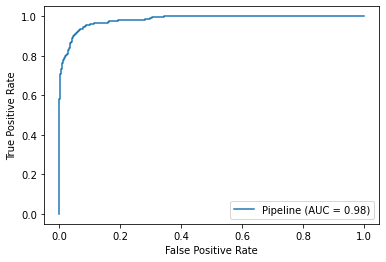

In [26]:
model_v2_disp = plot_roc_curve(model_v2, X_test, y_test)

---

### Evaluate the model for TopPerformers vs Non TopPerformer

In [27]:
X_test.shape

(1126, 46)

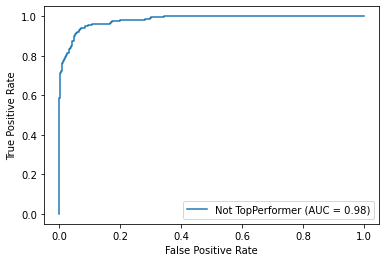

In [28]:
model_v2_ntp = plot_roc_curve(model_v2, X_test[X_test['TopPerformer']== 0], y_test[X_test[X_test['TopPerformer'] == 0].index.values], name = 'Not TopPerformer')

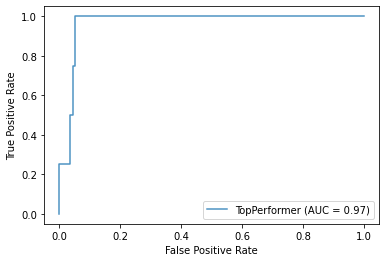

In [29]:
ax = pyplot.gca()
model_v2_tp = plot_roc_curve(model_v2, X_test[X_test['TopPerformer']== 1], y_test[X_test[X_test['TopPerformer'] == 1].index.values], name = 'TopPerformer', ax=ax, alpha=0.8)

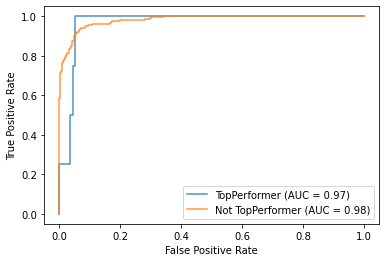

In [30]:
ax = pyplot.gca()
model_v2_tp = plot_roc_curve(model_v2, X_test[X_test['TopPerformer']== 1], y_test[X_test[X_test['TopPerformer'] == 1].index.values], name = 'TopPerformer', ax=ax, alpha=0.8)
model_v2_ntp.plot(ax=ax, alpha=0.8)

**From the above plot we can see our model A is pretty robust when it comes to identify wheater or not a given employee, Top Performer or not, will be leaving the Organization. Being slightly better at identifying general employees migration.**

---

### By Gender:

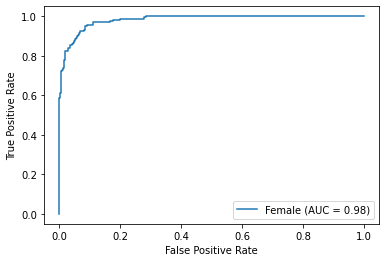

In [31]:
model_v2_fem = plot_roc_curve(model_v2, X_test[X_test['Gender']== 'Female'], y_test[X_test[X_test['Gender'] == 'Female'].index.values], name = 'Female')

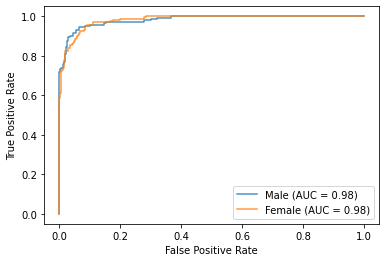

In [32]:
ax_v2 = pyplot.gca()
model_v2_male = plot_roc_curve(model_v2, X_test[X_test['Gender']== 'Male'], y_test[X_test[X_test['Gender'] == 'Male'].index.values], name = 'Male', ax=ax_v2, alpha=0.8)
model_v2_fem.plot(ax=ax_v2, alpha=0.8)


**When it comes to Gender our model A presents similar strong performance in identifying Male and Female employees migration from the Organization.**

---

### By Generation:

In [33]:
X_test['Generation'].unique()

array(['Generation Y / Millennials (1981 -1996)',
       'Generation X (1965 -1980)', 'Generation Z (1997 and onwards)',
       'Baby Boomers (1946 -1964)', 'Not Available'], dtype=object)

**Generation Baby Boomers removed due to reduced sampling:**

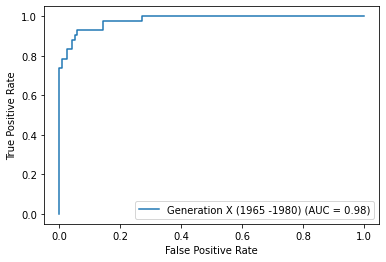

In [34]:
model_v2_gx = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Generation X (1965 -1980)'], y_test[X_test[X_test['Generation'] == 'Generation X (1965 -1980)'].index.values], name ='Generation X (1965 -1980)')

# model_v2_bb = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Baby Boomers (1946 -1964)'], y_test[X_test[X_test['Generation'] == 'Baby Boomers (1946 -1964)'].index.values], name = 'Baby Boomers (1946 -1964)')

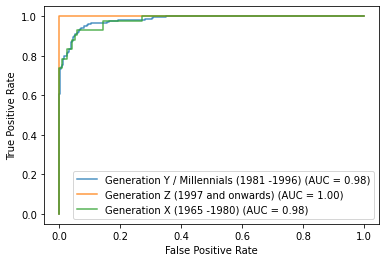

In [35]:
ax_v3 = pyplot.gca()
model_v2_gy = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Generation Y / Millennials (1981 -1996)'], y_test[X_test[X_test['Generation'] == 'Generation Y / Millennials (1981 -1996)'].index.values], name ='Generation Y / Millennials (1981 -1996)', ax=ax_v3, alpha=0.8)
model_v2_gz = plot_roc_curve(model_v2, X_test[X_test['Generation']== 'Generation Z (1997 and onwards)'], y_test[X_test[X_test['Generation'] == 'Generation Z (1997 and onwards)'].index.values], name ='Generation Z (1997 and onwards)', ax=ax_v3, alpha=0.8)


model_v2_gx.plot(ax=ax_v3, alpha=0.8)


**Filtering by Generation we can conclude that the ability for model A to predict employee migration is still robust, reaching 1.00 with regards to Generation Z. And considering this is the most recent Generation hitting the professional market and therefore much more volatile in terms of commitment with any given company, these results are very encouraging and helpful for the Organization.**

**Note:**

**Overall model A was very close to perfection, but we can not ignore the fact that it contains overestimating features as previously analyzed with Feature Importance and it has direct impact on these results. We will now look at model B performance without these overestimating features.**